In [1]:
import os
import imp
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import sys
import pickle as plk
import importlib.util
from numpy.lib.scimath import sqrt as csqrt
from IPython.display import display, Math

###############################################################
#LINUX PATH

# sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
# import lumapi
# sys.path.append(os.path.dirname('/media/leonardo/datam02/Ring Resonator - Leonardo Pessôa/Ring-Resonator/Tutorial/')) #Current directory

###############################################################
# WINDOWS PATH

spec_win = importlib.util.spec_from_file_location('lumapi', 'C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py')
lumapi = importlib.util.module_from_spec(spec_win)
os.add_dll_directory("C:/Program Files/Lumerical/v202/api/python")
sys.path.append(os.path.dirname('D:/AAAAAAAArquivos/Facul/Capacitação/GitHub/BraggGrating'))
spec_win.loader.exec_module(lumapi)


def fwhm(band, reflection, dB):
    from scipy.signal import find_peaks
    peak, pd = find_peaks(reflection)
    rmax = reflection[peak[np.argmax(reflection[peak])]]

    if dB == True: 
        dB = 3
        rmax = rmax-dB
    else: 
        dB = 0 
        rmax = rmax/2

    for i in range(0, len(band)):
        if (reflection[i] <(rmax) and reflection[i+1] > (rmax)):
            min = i
            break

    for i in range(int(band[-1]/2), len(band)):
        if (reflection[i] > (rmax) and reflection[i+1] < (rmax)):
            max = i
            break
    print('FWHM = '+ str(np.round((band[max]-band[min])*1e9,4)) + 'nm')

    dots = [band[min]*1e9,reflection[min],band[max]*1e9, reflection[max]]
    
    return dots,min,max


C:\Users\lecob\AppData\Local\Temp\ipykernel_2160\4235410930.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


# Python Theoretical Graphics

In [2]:
# Constants
lambda_d = 1550e-9
pi = np.pi
c0 = 299792458
neff = 1.447
k0 = 2*pi/lambda_d

band = np.linspace(1545*1e-9, 1555*1e-9, 20000)
Cband = np.linspace(1530*1e-9, 1565*1e-9, 20000)

beta = (neff*2*pi)/Cband

In [3]:
# Parameters
L = 1e-3
rmax = 0.8

# Calculations
detuning = 2*pi*neff*(1/band - 1/lambda_d)
couplingSigma = 0

sigma = detuning + couplingSigma
k = np.arctanh(np.sqrt(rmax))/L

#Reflection
r = (np.sinh(csqrt((k**2 - sigma**2))*L)**2)/((np.cosh(csqrt((k**2 - sigma**2))*L)**2) - ((sigma**2)/(k**2)))

#Transmission 
T = 1 - r


C:\Users\lecob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\lecob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\signal\_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
C:\Users\lecob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


FWHM = 1.1956nm


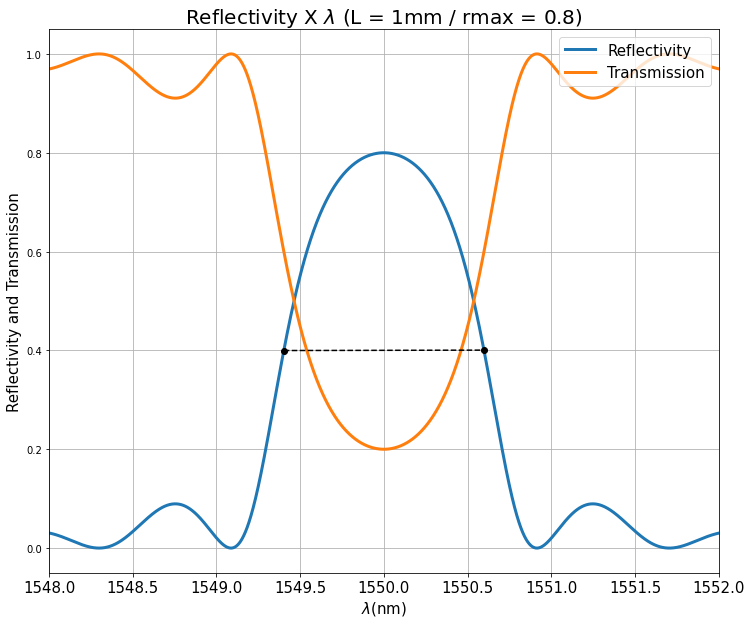

In [4]:
figure1 = plt.figure(figsize=(12, 10))

plt.grid(True)   
plt.title('Reflectivity X $\lambda$ (L = 1mm / rmax = 0.8)', size = 20)
plt.ylabel('Reflectivity and Transmission', size = '15')
plt.xlabel('$\lambda$(nm)', size = '15')
plt.xticks(size = '15')
plt.xlim(1548,1552)
plt.plot(band*1e9, r, label = 'Reflectivity', linewidth = 3)
plt.plot(band*1e9, T, label = 'Transmission', linewidth = 3)

dots, min, max = fwhm(band, r, False)
plt.plot(dots[0],dots[1],'o',color='black')
plt.plot(dots[2],dots[3],'o',color='black')
plt.plot([dots[0],dots[2]],[dots[1],dots[3]],'--',color = 'black')

plt.legend(loc = 'upper right', prop = {'size': 15})
figure1.savefig('figure1.png')

FWHM = 1.1946nm


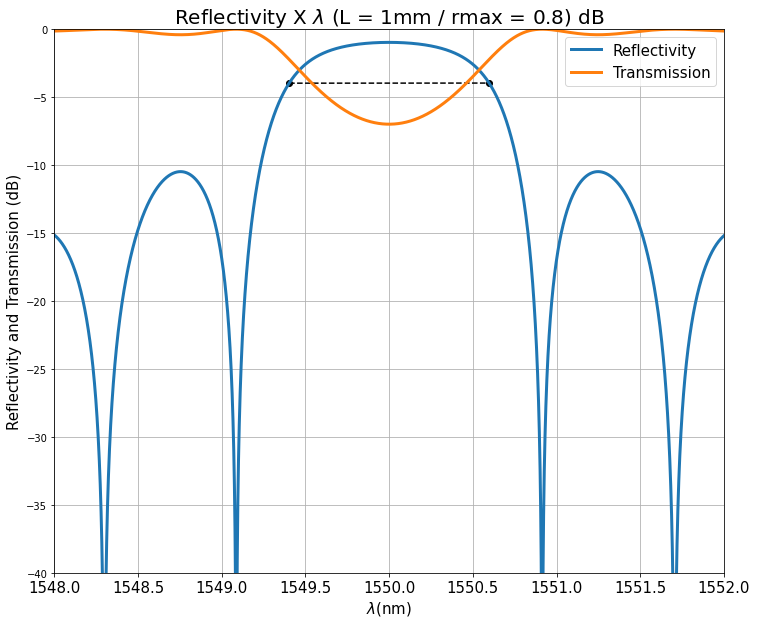

In [5]:
figure2 = plt.figure(figsize=(12, 10))

plt.grid(True)   
plt.title('Reflectivity X $\lambda$ (L = 1mm / rmax = 0.8) dB', size = 20)
plt.ylabel('Reflectivity and Transmission (dB)', size = '15')
plt.xlabel('$\lambda$(nm)', size = '15')
plt.xticks(size = '15')
plt.xlim(1548,1552)


dots, min, max = fwhm(band, 10*np.log10(r), True)
plt.plot(dots[0],dots[1],'o',color='black')
plt.plot(dots[2],dots[3],'o',color='black')
plt.plot([dots[0],dots[2]],[dots[1],dots[3]],'--',color = 'black')
plt.plot(band*1e9, 10*np.log10(r), label = 'Reflectivity', linewidth = 3)
plt.plot(band*1e9, 10*np.log10(T), label = 'Transmission', linewidth = 3)
plt.legend(loc = 'upper right', prop = {'size': 15})
plt.ylim(-40,0)

figure2.savefig('figure2.png')

In [6]:
# Parameters diferent k*L values
L = 1e-3

# Calculations
detuning = 2*pi*neff*(1/band - 1/lambda_d)
couplingSigma = 0

sigma = detuning + couplingSigma
kL2 = 2/L
kL8 = 8/L

#Reflection
rkL2 = (np.sinh(csqrt((kL2**2 - sigma**2))*L)**2)/((np.cosh(csqrt((kL2**2 - sigma**2))*L)**2) - ((sigma**2)/(kL2**2)))
rkL8 = (np.sinh(csqrt((kL8**2 - sigma**2))*L)**2)/((np.cosh(csqrt((kL8**2 - sigma**2))*L)**2) - ((sigma**2)/(kL8**2)))

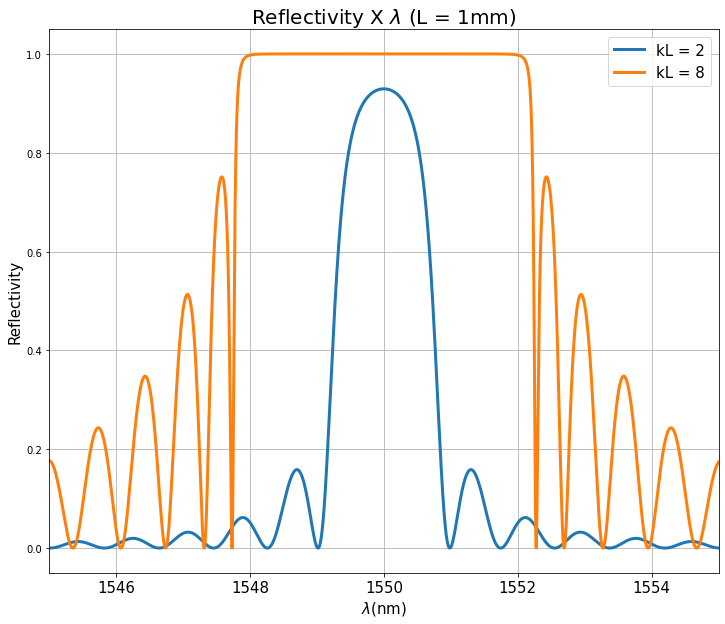

In [7]:
figure3 = plt.figure(figsize=(12, 10))

plt.grid(True)   
plt.title('Reflectivity X $\lambda$ (L = 1mm)', size = 20)
plt.ylabel('Reflectivity', size = '15')
plt.xlabel('$\lambda$(nm)', size = '15')
plt.xticks(size = '15')
plt.xlim(1545,1555)

plt.plot(band*1e9, rkL2, label = 'kL = 2', linewidth = 3)
plt.plot(band*1e9, rkL8, label = 'kL = 8', linewidth = 3)
plt.legend(loc = 'upper right', prop = {'size': 15})


figure3.savefig('figure3.png')

In [8]:
# Parameters diferent L values
L = [1e-3,1.5e-3,2e-3]
rmax = 0.85
# Calculations
detuning = 2*pi*neff*(1/band - 1/lambda_d)
couplingSigma = 0

k1 = np.arctanh(np.sqrt(rmax))/L[0]
k1d5 = np.arctanh(np.sqrt(rmax))/L[1]
k2 = np.arctanh(np.sqrt(rmax))/L[2]
sigma = detuning + couplingSigma

#Reflection
rL1 = (np.sinh(csqrt((k1**2 - sigma**2))*L[0])**2)/((np.cosh(csqrt((k1**2 - sigma**2))*L[0])**2) - ((sigma**2)/(k1**2)))
rL1d5 = (np.sinh(csqrt((k1d5**2 - sigma**2))*L[1])**2)/((np.cosh(csqrt((k1d5**2 - sigma**2))*L[1])**2) - ((sigma**2)/(k1d5**2)))
rL2 = (np.sinh(csqrt((k2**2 - sigma**2))*L[2])**2)/((np.cosh(csqrt((k2**2 - sigma**2))*L[2])**2) - ((sigma**2)/(k2**2)))

C:\Users\lecob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\lecob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\signal\_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


FWHM = 1.2776nm
FWHM = 0.8515nm
FWHM = 0.639nm


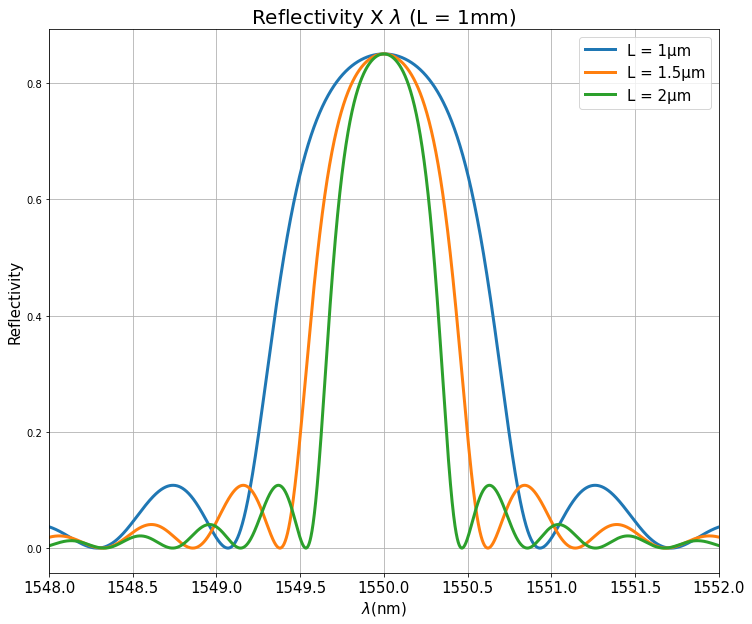

In [40]:
figure4 = plt.figure(figsize=(12, 10))

plt.grid(True)   
plt.title('Reflectivity X $\lambda$ (L = 1mm)', size = 20)
plt.ylabel('Reflectivity', size = '15')
plt.xlabel('$\lambda$(nm)', size = '15')
plt.xticks(size = '15')
plt.xlim(1548,1552)

plt.plot(band*1e9, rL1, label = 'L = 1µm', linewidth = 3)
fwhm(band, rL1, False)
plt.plot(band*1e9, rL1d5, label = 'L = 1.5µm', linewidth = 3)
fwhm(band, rL1d5, False)
plt.plot(band*1e9, rL2, label = 'L = 2µm', linewidth = 3)
fwhm(band, rL2, False)
plt.legend(loc = 'upper right', prop = {'size': 15})

figure4.savefig('figure4.png')

In [10]:
# Parameters diferent L values
L = 1e-3
rmax = [0.6, 0.7, 0.8]

# Calculations
detuning = 2*pi*neff*(1/band - 1/lambda_d)
couplingSigma = 0

kd6 = np.arctanh(np.sqrt(rmax[0]))/L
kd7 = np.arctanh(np.sqrt(rmax[1]))/L
kd8 = np.arctanh(np.sqrt(rmax[2]))/L
sigma = detuning + couplingSigma

#Reflection
rd6 = (np.sinh(csqrt((kd6**2 - sigma**2))*L)**2)/((np.cosh(csqrt((kd6**2 - sigma**2))*L)**2) - ((sigma**2)/(kd6**2)))
rd7 = (np.sinh(csqrt((kd7**2 - sigma**2))*L)**2)/((np.cosh(csqrt((kd7**2 - sigma**2))*L)**2) - ((sigma**2)/(kd7**2)))
rd8 = (np.sinh(csqrt((kd8**2 - sigma**2))*L)**2)/((np.cosh(csqrt((kd8**2 - sigma**2))*L)**2) - ((sigma**2)/(kd8**2)))

FWHM = 0.9955nm
FWHM = 1.0791nm
FWHM = 1.1956nm


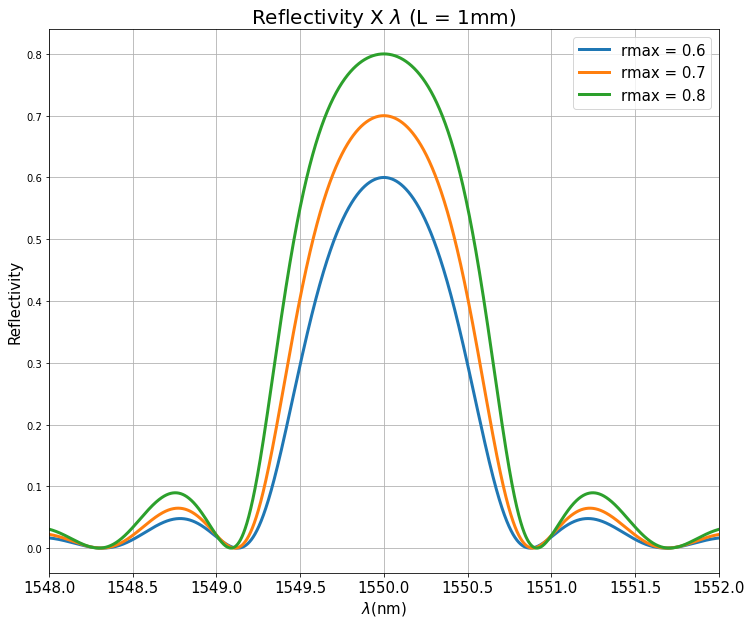

In [11]:
figure5 = plt.figure(figsize=(12, 10))

plt.grid(True)   
plt.title('Reflectivity X $\lambda$ (L = 1mm)', size = 20)
plt.ylabel('Reflectivity', size = '15')
plt.xlabel('$\lambda$(nm)', size = '15')
plt.xticks(size = '15')
plt.xlim(1548,1552)

plt.plot(band*1e9, rd6, label = 'rmax = 0.6', linewidth = 3)
fwhm(band, rd6, False)
plt.plot(band*1e9, rd7, label = 'rmax = 0.7', linewidth = 3)
fwhm(band, rd7, False)
plt.plot(band*1e9, rd8, label = 'rmax = 0.8', linewidth = 3)
fwhm(band, rd8, False)
plt.legend(loc = 'upper right', prop = {'size': 15})

figure5.savefig('figure5.png')

# Interconnect Integration

In [25]:
icp = lumapi.INTERCONNECT('Interconnect_Integration.icp')

In [13]:
# Parameters
L = 1e-3
#rmax = 0.8

# Calculations
detuning = 2*pi*neff*(1/band - 1/lambda_d)
couplingSigma = 0

sigma = detuning + couplingSigma
k = 1.64/L

#Reflection
r = (np.sinh(csqrt((k**2 - sigma**2))*L)**2)/((np.cosh(csqrt((k**2 - sigma**2))*L)**2) - ((sigma**2)/(k**2)))


In [14]:
#icp.switchtodesign()
#icp.deleteall()

In [15]:
'''
icp.addelement("Optical Network Analyzer")
icp.set("name", "ONA_1")
icp.set("number of input ports", 2)
icp.set("input parameter", "start and stop")
icp.set("start frequency", c0/Cband[0])
icp.set("stop frequency", c0/Cband[-1])
icp.set("number of points", 1e5)

icp.addelement("Optical Network Analyzer")
icp.set("name", "ONA_2")
icp.set("number of input ports", 2)
icp.set("input parameter", "start and stop")
icp.set("start frequency", c0/Cband[0])
icp.set("stop frequency", c0/Cband[-1])
icp.set("number of points", 1e5)

icp.addelement("Optical Network Analyzer")
icp.set("name", "ONA_3")
icp.set("number of input ports", 2)
icp.set("input parameter", "start and stop")
icp.set("start frequency", c0/Cband[0])
icp.set("stop frequency", c0/Cband[-1])
icp.set("number of points", 1e5)
'''

'\nicp.addelement("Optical Network Analyzer")\nicp.set("name", "ONA_1")\nicp.set("number of input ports", 2)\nicp.set("input parameter", "start and stop")\nicp.set("start frequency", c0/Cband[0])\nicp.set("stop frequency", c0/Cband[-1])\nicp.set("number of points", 1e4)\n\nicp.addelement("Optical Network Analyzer")\nicp.set("name", "ONA_2")\nicp.set("number of input ports", 2)\nicp.set("input parameter", "start and stop")\nicp.set("start frequency", c0/Cband[0])\nicp.set("stop frequency", c0/Cband[-1])\nicp.set("number of points", 1e4)\n\nicp.addelement("Optical Network Analyzer")\nicp.set("name", "ONA_3")\nicp.set("number of input ports", 2)\nicp.set("input parameter", "start and stop")\nicp.set("start frequency", c0/Cband[0])\nicp.set("stop frequency", c0/Cband[-1])\nicp.set("number of points", 1e4)\n\nicp.addelement("Optical Network Analyzer")\nicp.set("name", "ONA_4")\nicp.set("number of input ports", 2)\nicp.set("input parameter", "start and stop")\nicp.set("start frequency", c0/C

In [16]:
'''
# Adding Bragg Grating
icp.addelement("Bragg Grating")
icp.set('length', 1e-3)

icp.addelement("Bragg Grating")
icp.set('length', 1e-3)

icp.addelement("Bragg Grating")
icp.set('length', 1e-3)
'''

'\n# Adding Bragg Grating\nicp.addelement("Bragg Grating")\nicp.set(\'length\', 1e-3)\n\nicp.addelement("Bragg Grating")\nicp.set(\'length\', 1e-3)\n\nicp.addelement("Bragg Grating")\nicp.set(\'length\', 1e-3)\n\nicp.addelement("Bragg Grating")\nicp.set(\'length\', 1e-3)\n'

In [17]:
#Setting up the theoretical values in the interconnect Component
dn_ac = k*lambda_d/pi
print('Effective index change ac = ', dn_ac)

Effective index change ac =  0.0008091437306791958


In [34]:
# Getting Interconnect Results
icp.switchtodesign()
icp.run()
result_ona_gain1 = icp.getresult('ONA_1','input 1/mode 1/gain')
result_ona_transmission1 = icp.getresult('ONA_1','input 1/mode 1/transmission')

wavelength1 = result_ona_gain1['wavelength']
gain1 = result_ona_gain1['TE gain (dB)']
transmission1 = result_ona_transmission1['TE transmission']

result_ona_gain2 = icp.getresult('ONA_2','input 1/mode 1/gain')
result_ona_transmission2 = icp.getresult('ONA_2','input 1/mode 1/transmission')

wavelength2 = result_ona_gain2['wavelength']
gain2 = result_ona_gain2['TE gain (dB)']
transmission2 = result_ona_transmission2['TE transmission']

result_ona_gain3 = icp.getresult('ONA_3','input 1/mode 1/gain')
result_ona_transmission3 = icp.getresult('ONA_3','input 1/mode 1/transmission')

wavelength3 = result_ona_gain3['wavelength']
gain3 = result_ona_gain3['TE gain (dB)']
transmission3 = result_ona_transmission3['TE transmission']

FWHM = 1.2976nm


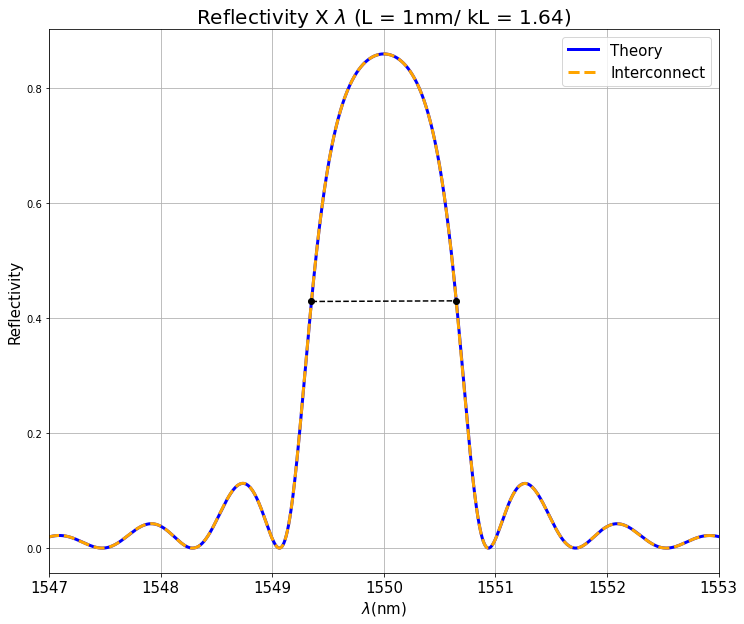

In [42]:
figure6 = plt.figure(figsize=(12, 10))

plt.grid(True)   
plt.title('Reflectivity X $\lambda$ (L = 1mm/ kL = 1.64)', size = 20)
plt.ylabel('Reflectivity', size = '15')
plt.xlabel('$\lambda$(nm)', size = '15')
plt.xticks(size = '15')
plt.xlim(1547,1553)
plt.plot(band*1e9, r, linewidth = 3, label = 'Theory', color = 'blue')
plt.plot(wavelength1*1e9, abs(transmission1)**2, '--', linewidth = 3, label = 'Interconnect', color = 'orange')
plt.legend(loc = 'upper right', prop = {'size': 15})

dots, min, max = fwhm(band, r, False)
plt.plot(dots[0],dots[1],'o',color='black')
plt.plot(dots[2],dots[3],'o',color='black')
plt.plot([dots[0],dots[2]],[dots[1],dots[3]],'--',color = 'black')

figure6.savefig('figure6.png')

C:\Users\lecob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\lecob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\signal\_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


FWHM = 1.2966nm


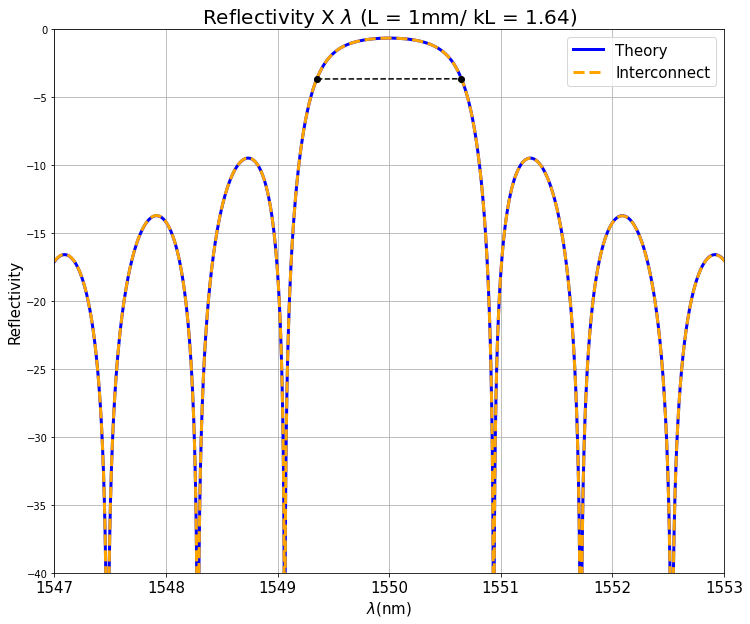

In [41]:
figure7 = plt.figure(figsize=(12, 10))

plt.grid(True)   
plt.title('Reflectivity X $\lambda$ (L = 1mm/ kL = 1.64)', size = 20)
plt.ylabel('Reflectivity', size = '15')
plt.xlabel('$\lambda$(nm)', size = '15')
plt.xticks(size = '15')
plt.xlim(1547,1553)
plt.plot(band*1e9, 10*np.log10(r), linewidth = 3, label = 'Theory', color = 'blue')
plt.plot(wavelength1*1e9, gain1,'--', linewidth = 3, label = 'Interconnect', color = 'orange')
plt.legend(loc = 'upper right', prop = {'size': 15})

dots, min, max = fwhm(band, 10*np.log10(r), True)
plt.plot(dots[0],dots[1],'o',color='black')
plt.plot(dots[2],dots[3],'o',color='black')
plt.plot([dots[0],dots[2]],[dots[1],dots[3]],'--',color = 'black')
plt.ylim(-40,0)

figure7.savefig('figure7.png')

FWHM = [-1.2734]nm


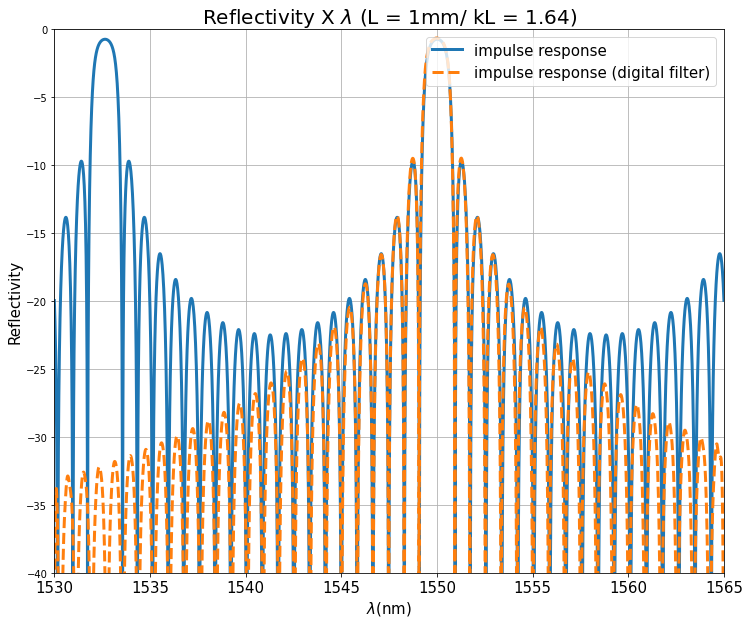

In [43]:
figure8 = plt.figure(figsize=(12, 10))

plt.grid(True)   
plt.title('Reflectivity X $\lambda$ (L = 1mm/ kL = 1.64)', size = 20)
plt.ylabel('Reflectivity', size = '15')
plt.xlabel('$\lambda$(nm)', size = '15')
plt.xticks(size = '15')
plt.xlim(1530,1565)
plt.ylim(-40,0)
#plt.plot(wavelength1, gain1, label = 'scattering data', linewidth = 5)
#fwhm(wavelength1, gain1, True)
plt.plot(wavelength2*1e9, gain2, label = 'impulse response', linewidth = 3)
fwhm(wavelength2, gain2, True)
plt.plot(wavelength3*1e9, gain3,'--', label = 'impulse response (digital filter)', linewidth = 3)
plt.legend(loc = 'upper right', prop = {'size': 15})

figure8.savefig('figure8.png')

FWHM = [-1.2962]nm
FWHM = [-1.2734]nm


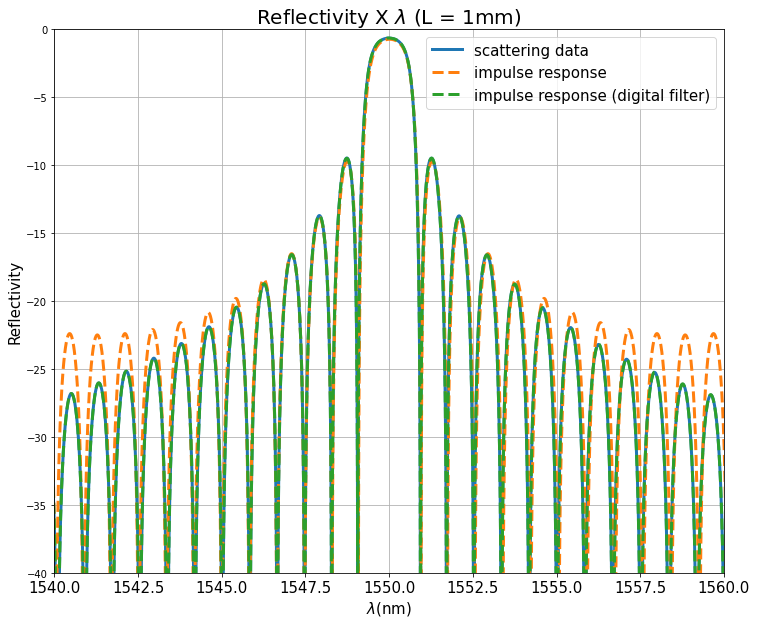

In [44]:
figure9 = plt.figure(figsize=(12, 10))

plt.grid(True)   
plt.title('Reflectivity X $\lambda$ (L = 1mm)', size = 20)
plt.ylabel('Reflectivity', size = '15')
plt.xlabel('$\lambda$(nm)', size = '15')
plt.xticks(size = '15')
plt.xlim(1540,1560)
plt.ylim(-40,0)
plt.plot(wavelength1*1e9, gain1, label = 'scattering data', linewidth = 3)
fwhm(wavelength1, gain1, True)
plt.plot(wavelength2*1e9, gain2,'--', label = 'impulse response', linewidth = 3)
fwhm(wavelength2, gain2, True)
plt.plot(wavelength3*1e9, gain3,'--', label = 'impulse response (digital filter)', linewidth = 3)
plt.legend(loc = 'upper right', prop = {'size': 15})

figure9.savefig('figure9.png')

FWHM = [-1.2962]nm


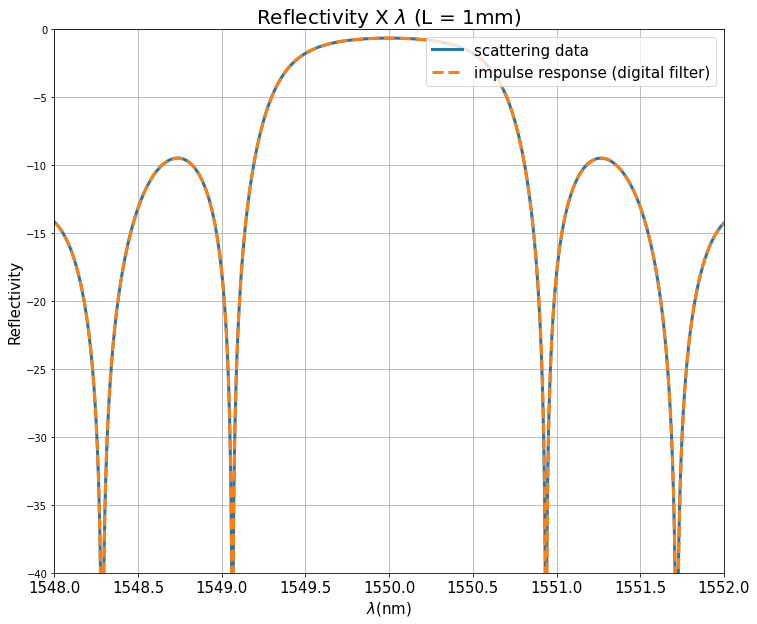

In [39]:
figure10 = plt.figure(figsize=(12, 10))

plt.grid(True)   
plt.title('Reflectivity X $\lambda$ (L = 1mm)', size = 20)
plt.ylabel('Reflectivity', size = '15')
plt.xlabel('$\lambda$(nm)', size = '15')
plt.xticks(size = '15')
plt.xlim(1548,1552)
plt.ylim(-40,0)
plt.plot(wavelength1*1e9, gain1, label = 'scattering data', linewidth = 3)
fwhm(wavelength1, gain1, True)

plt.plot(wavelength3*1e9, gain3,'--', label = 'impulse response (digital filter)', linewidth = 3)
plt.legend(loc = 'upper right', prop = {'size': 15})

figure10.savefig('figure10.png')

In [24]:
icp.switchtodesign()
icp.save()
#icp.close()